In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sba=pd.read_csv('SBAnational.csv')
sba.head(2)

C:\Users\admin\AppData\Local\Temp\ipykernel_54984\204456616.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sba=pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


In [5]:
data=pd.read_csv('SBA_Loan_Data.csv')
data.head(2)

,Unnamed: 0,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,0,84,2.0,60000,48000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,60,2.0,40000,32000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [6]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x

In [7]:
sba['GrAppv'] = sba['GrAppv'].apply(currencyCleaning).astype(float).astype(int)
sba['SBA_Appv'] = sba['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)

In [11]:
MIS_Status = pd.get_dummies(sba['MIS_Status'], drop_first=False,dtype=int)
sba['Default'] = MIS_Status['CHGOFF']

In [14]:
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Default
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,60000,48000,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,40000,32000,0


<function matplotlib.pyplot.show(close=None, block=None)>

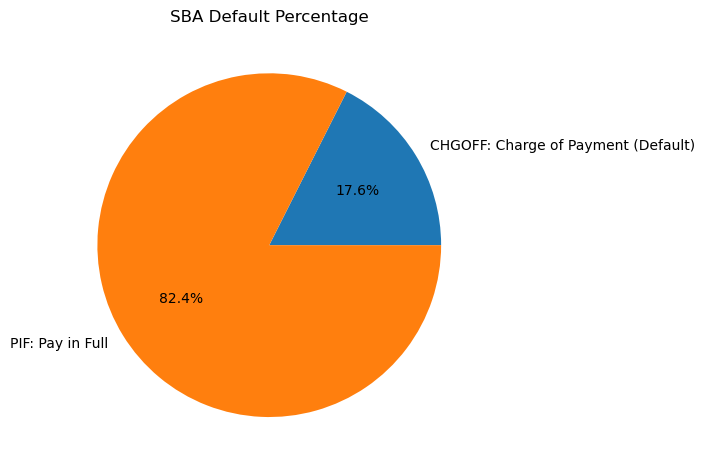

In [15]:
pieSBA = sba.groupby('MIS_Status').count()
values = pieSBA['LoanNr_ChkDgt']
labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title('SBA Default Percentage')
plt.tight_layout()
plt.show

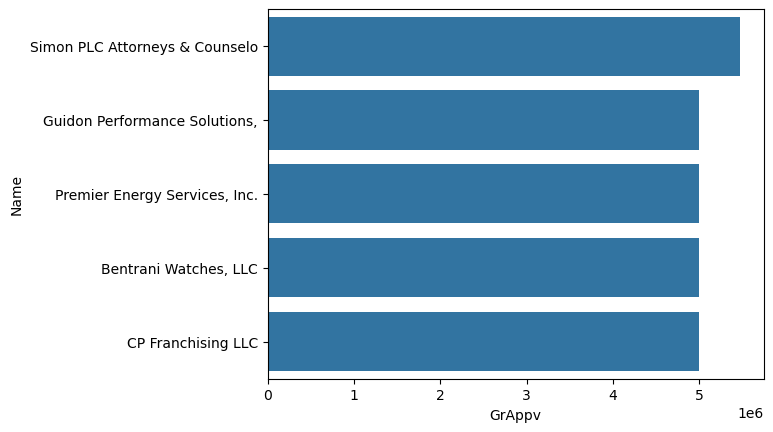

In [23]:
sns.barplot(x='GrAppv' , y='Name', data=sba.sort_values('GrAppv',ascending=False).head(5), orient="h")
plt.show()

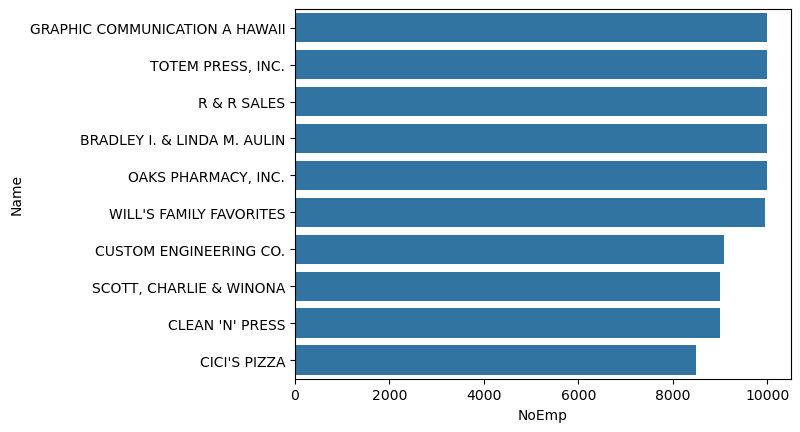

In [21]:
sns.barplot(x='NoEmp' , y='Name', data=sba.sort_values('NoEmp',ascending=False).head(10), orient="h")
plt.show()

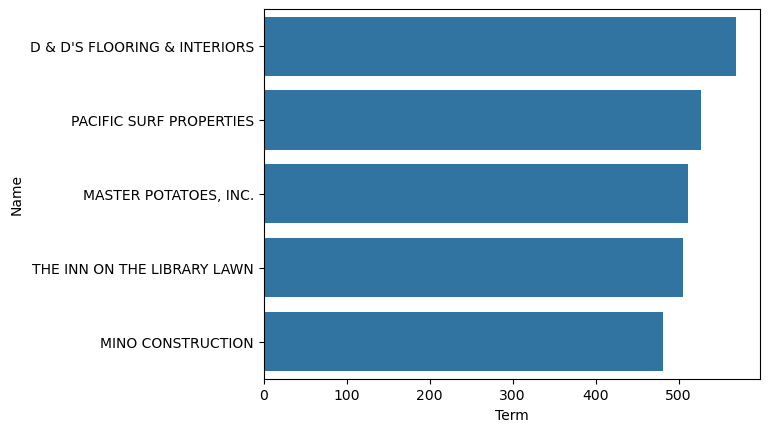

In [19]:
 sns.barplot(x='Term' , y='Name', data=sba.sort_values('Term',ascending=False).head(5), orient="h")
plt.show()

In [24]:
def naicsEngineering(x):
    x = str(x)
    x = x[:2]
    if (x == '31') | (x == '32') | (x == '33'):
        x = '31-33'
    elif (x == '44') | (x == '45'):
        x = '44-45'
    elif (x == '48') | (x == '49'):
        x = '48-49'
    return x

In [26]:
sba.NAICS = sba.NAICS.apply(naicsEngineering)

In [27]:
NAICS = sba[sba.NAICS != '0']

C:\Users\admin\AppData\Local\Temp\ipykernel_54984\1359954758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=NAICS1.index , y=NAICS1['LoanNr_ChkDgt'],palette="Blues_d")


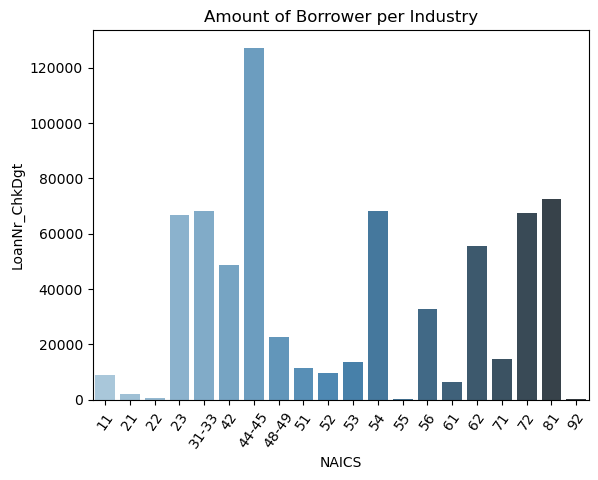

In [28]:
NAICS1 = NAICS.groupby('NAICS').count()
sns.barplot(x=NAICS1.index , y=NAICS1['LoanNr_ChkDgt'],palette="Blues_d")
plt.title('Amount of Borrower per Industry')
plt.xticks(rotation=55)
plt.show()

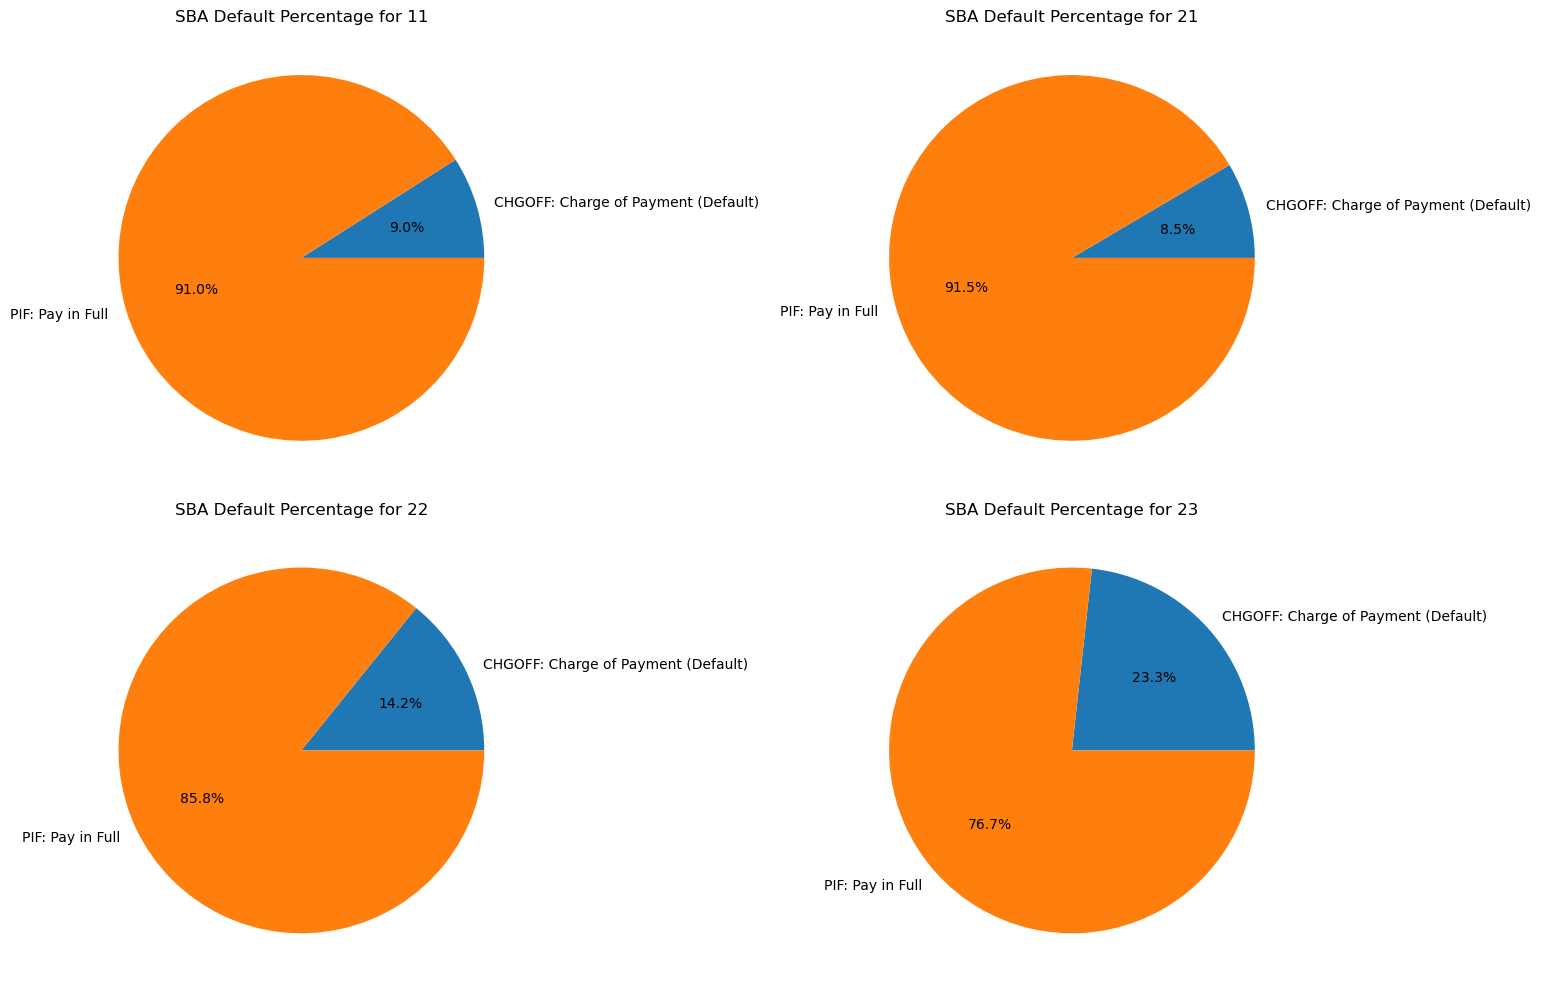

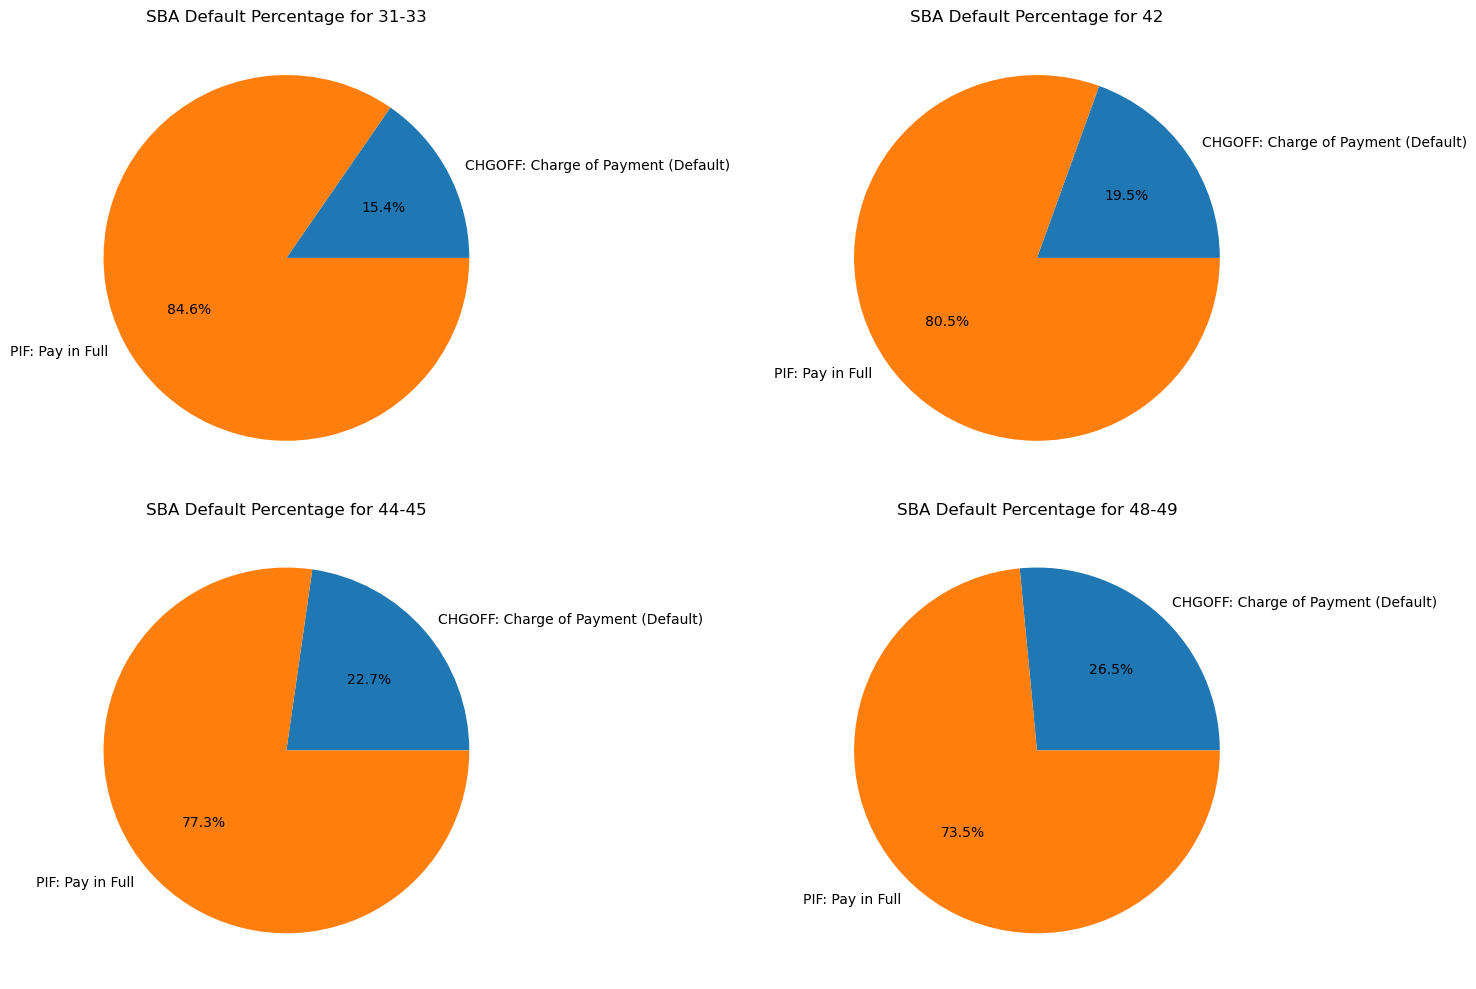

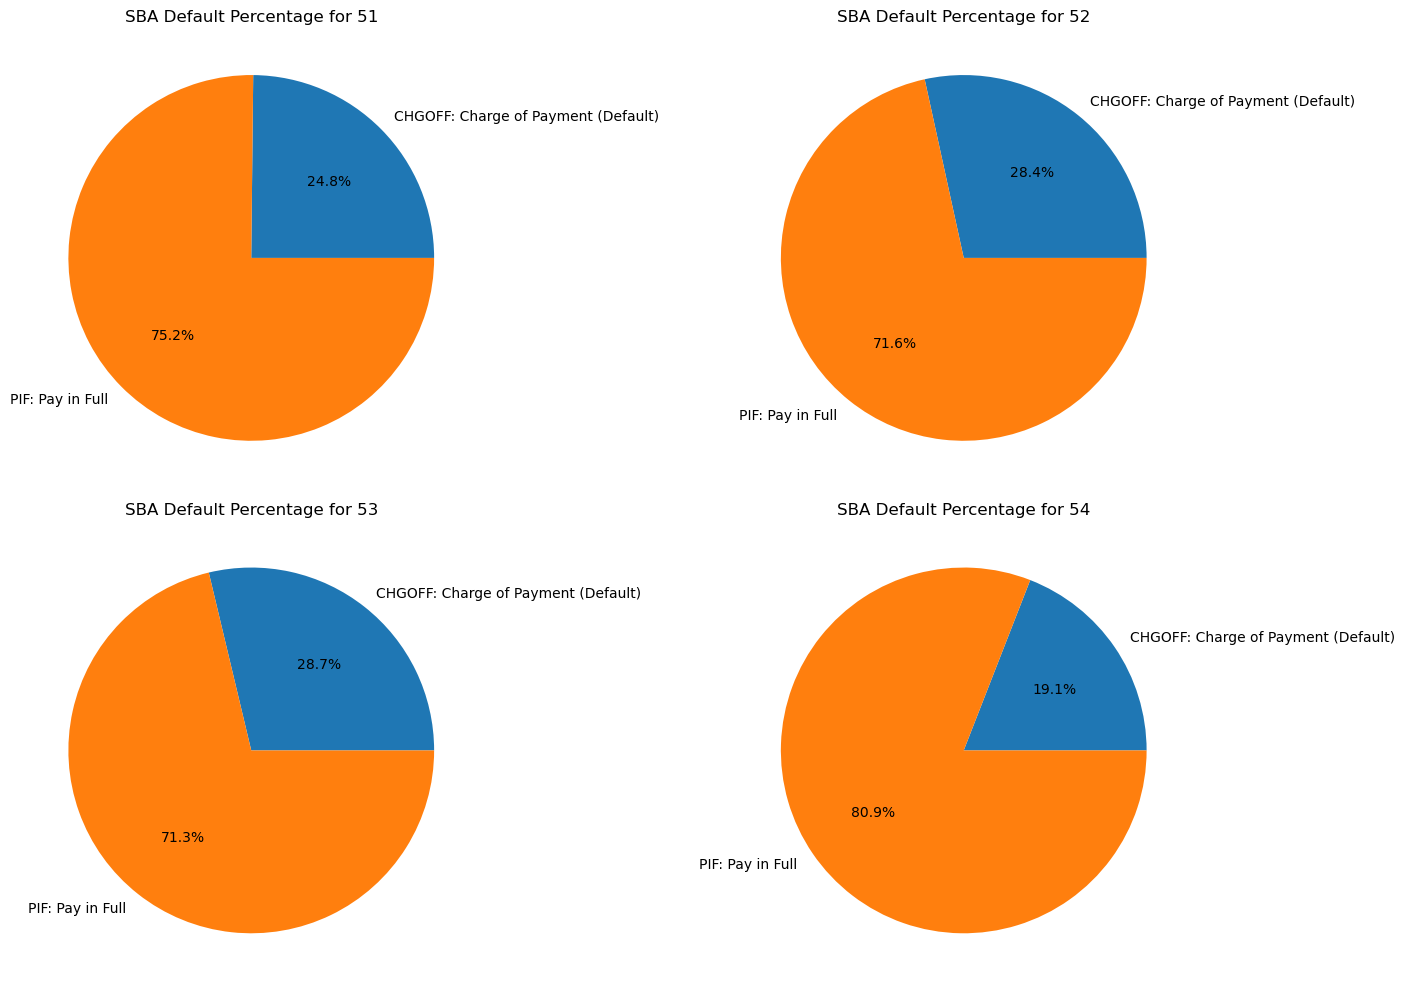

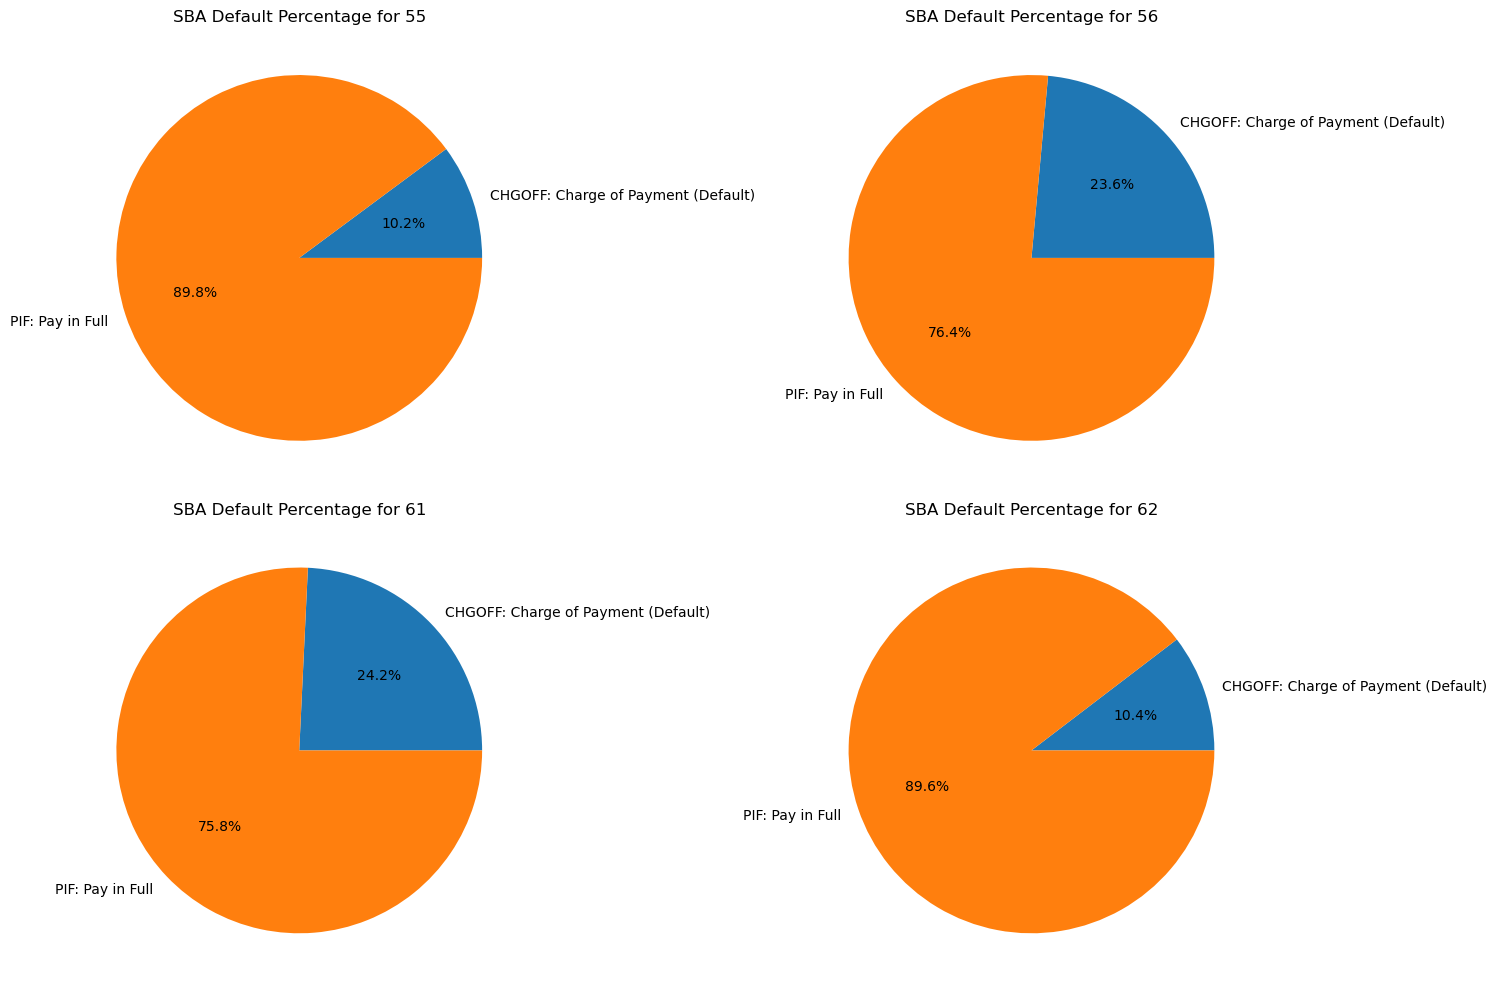

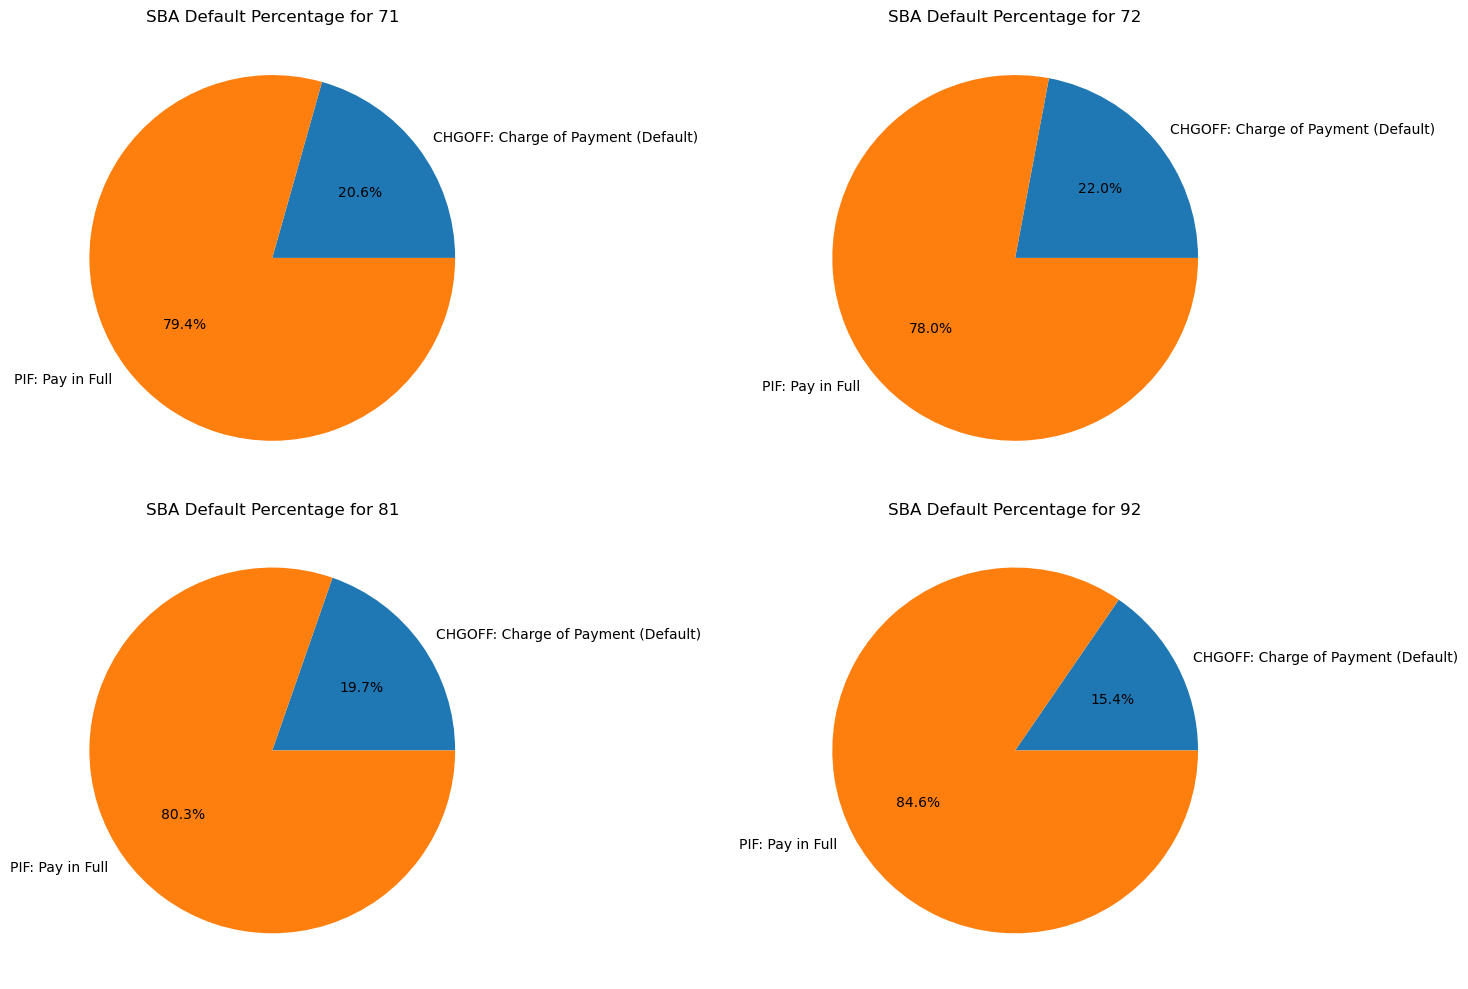

In [29]:
x = 0
y = 221    
for i in NAICS1.index:
    if (x % 4) == 0:
        plt.figure(figsize=(16,10))
        y=221
        plt.subplot(y)
        y+=1
    else:
        plt.subplot(y)
        y+=1
    pieSBA = sba[sba.NAICS==i].groupby('MIS_Status').count()
    values = pieSBA['LoanNr_ChkDgt']
    labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
    plt.pie(values, labels = labels, autopct='%1.1f%%')
    plt.title(f'SBA Default Percentage for {i}')
    plt.tight_layout()
    plt.show
    x+=1

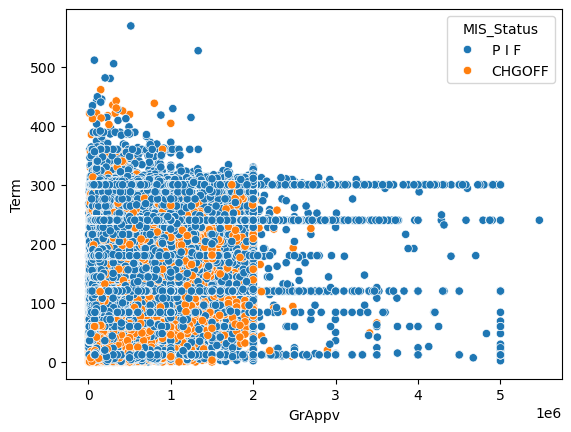

In [32]:
sns.scatterplot(x=sba["GrAppv"], y=sba["Term"],hue=sba["MIS_Status"])
plt.show()

In [33]:
data[['GrAppv','SBA_Appv','Term','Approve']].corr()

,GrAppv,SBA_Appv,Term,Approve
GrAppv,1.000000,0.981520,0.460258,0.138798
SBA_Appv,0.981520,1.000000,0.495474,0.148743
Term,0.460258,0.495474,1.000000,0.338688
Approve,0.138798,0.148743,0.338688,1.000000


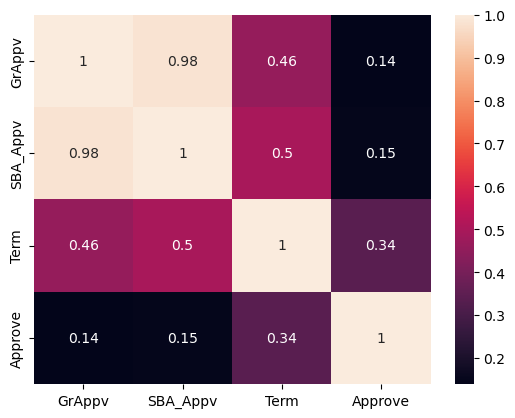

In [34]:
sns.heatmap(data[['GrAppv','SBA_Appv','Term','Approve']].corr(), annot=True)
plt.show()

In [ ]:
sns.heatmap(data,annot=True)
plt.show()